# Import Libraries

In [1]:
import zipfile, os

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.image as mpimg
%matplotlib inline

from google.colab import files
from keras.preprocessing import image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract File

In [3]:
os.mkdir('dataset')
dataset_dir = 'dataset'

In [3]:
target_file = 'dataset.zip'

extracting = zipfile.ZipFile(target_file, 'r')

extracting.extractall(dataset_dir)

extracting.close()

In [4]:
train_dir = 'dataset/Training'
val_dir = 'dataset/Testing'

# Load Data

In [39]:
glioma_dir = os.path.join('dataset/Training/glioma')
meningioma_dir = os.path.join('dataset/Training/meningioma')
notumor_dir = os.path.join('dataset/Training/notumor')
pituitary_dir = os.path.join('dataset/Training/pituitary')

In [40]:
glioma_files = os.listdir(glioma_dir)
meningloma_files = os.listdir(meningioma_dir)
notumor_files = os.listdir(notumor_dir)
pituitary_files = os.listdir(pituitary_dir)

In [36]:
print('Total glioma images :', len(glioma_files))
print('Total meningloma images :', len(meningloma_files))
print('Total notumor images :', len(notumor_files))
print('Total pituitary images :', len(pituitary_dir))

Total glioma images : 1321
Total meningloma images : 1339
Total notumor images : 1595
Total pituitary images : 1457


# Data Augmentation

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255
)

In [6]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Modelling

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [8]:
model.compile(metrics=['acc'], loss='categorical_crossentropy', optimizer='adam')

history= model.fit(train_generator, epochs=10, validation_data=val_generator, shuffle=True)

Epoch 1/10
179/179 [==============================] - 628s 4s/step - loss: 0.6399 - acc: 0.7540 - val_loss: 0.3779 - val_acc: 0.8474
Epoch 2/10
179/179 [==============================] - 620s 3s/step - loss: 0.2545 - acc: 0.9107 - val_loss: 0.2594 - val_acc: 0.8947
Epoch 3/10
179/179 [==============================] - 623s 3s/step - loss: 0.1472 - acc: 0.9466 - val_loss: 0.2308 - val_acc: 0.9176
Epoch 4/10
179/179 [==============================] - 620s 3s/step - loss: 0.1075 - acc: 0.9597 - val_loss: 0.1705 - val_acc: 0.9405
Epoch 5/10
179/179 [==============================] - 653s 4s/step - loss: 0.0672 - acc: 0.9764 - val_loss: 0.1748 - val_acc: 0.9458
Epoch 6/10
179/179 [==============================] - 631s 4s/step - loss: 0.0485 - acc: 0.9837 - val_loss: 0.2552 - val_acc: 0.9306
Epoch 7/10
179/179 [==============================] - 630s 4s/step - loss: 0.0413 - acc: 0.9874 - val_loss: 0.1544 - val_acc: 0.9603
Epoch 8/10
179/179 [==============================] - 628s 4s/step - 

# Evaluation

> Model isn't overfit or underfit

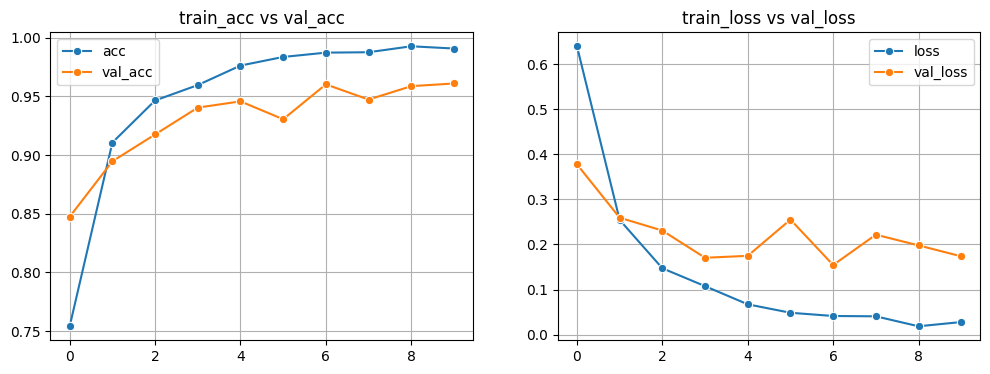

In [9]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=history.history['acc'], ax=axes[0], label='acc', marker='o')
sns.lineplot(data=history.history['val_acc'], ax=axes[0], label='val_acc', marker='o')

sns.lineplot(data=history.history['loss'], ax=axes[1], label='loss', marker='o')
sns.lineplot(data=history.history['val_loss'], ax=axes[1], label='val_loss', marker='o')

axes[0].set_title('train_acc vs val_acc')
axes[1].set_title('train_loss vs val_loss')

axes[0].grid(True)
axes[1].grid(True)

plt.legend()
plt.show()

# Implementation

Saving image(2).jpg to image(2) (2).jpg
1/1 [==============================] - 0s 55ms/step
meningloma_tumor


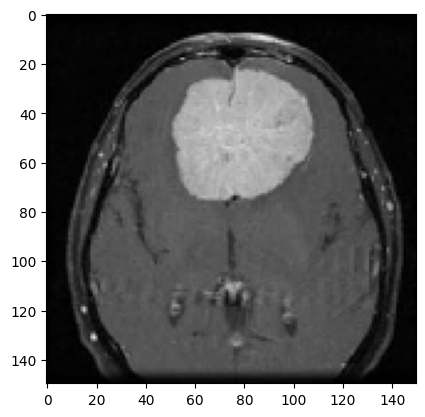

In [21]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes[0][0] == 1:
    print('giloma tumor')
  elif classes[0][1] == 1:
    print('meningloma_tumor')
  elif classes[0][2] == 1:
    print('no tumor')
  elif classes[0][3] == 1:
    print('pituitary_umot')

# Save Model

In [10]:
model.save('brain_tumor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
